In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import path
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [54]:
import pandas as pd 
import numpy as np 
import os 
import csv 
import requests 
import urllib.request

In [55]:
batch_size = 32
IMG_SIZE = (224, 224)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_set = train_datagen.flow_from_directory(
        'C:/Users/rpshc/Desktop/Assingment/Base_Folder/train/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['AreaGraph', 'BarGraph', 'LineGraph', 'Map', 'ParetoChart', 
               'PieChart','RadarPlot','ScatterGraph','Table','VennDiagram'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 439 images belonging to 10 classes.


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
val_generator = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using val_generator generator
val_set = train_datagen.flow_from_directory(
        'C:/Users/rpshc/Desktop/Assingment/Base_Folder/val/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['AreaGraph', 'BarGraph', 'LineGraph', 'Map', 'ParetoChart', 
               'PieChart','RadarPlot','ScatterGraph','Table','VennDiagram'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 190 images belonging to 10 classes.


In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using test_generator generator
test_set = train_datagen.flow_from_directory(
        'C:/Users/rpshc/Desktop/Assingment/Base_Folder/test/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['AreaGraph', 'BarGraph', 'LineGraph', 'Map', 'ParetoChart', 
               'PieChart','RadarPlot','ScatterGraph','Table','VennDiagram'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 90 images belonging to 10 classes.


In [58]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [59]:
import tensorflow as tf

In [60]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [61]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [62]:
image_batch, label_batch = next(iter(train_set))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [63]:
base_model.trainable = False

In [64]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

Total params: 2,257,984
Trainable params: 0
Non-trainable params: 2,257,984
__________________________________________________________________________________________________


In [65]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [66]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [67]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [68]:
base_learning_rate = 0.0001
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv_1 (TFOpLambd (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0   

In [70]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_set)

6/6 [==============================] - 7s 1s/step - loss: 1.1921e-07 - accuracy: 0.9000


In [71]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.00
initial accuracy: 0.90


In [49]:
history = model.fit(train_set,
                    epochs=initial_epochs,
                    validation_data=val_set,
                    verbose=1)

Epoch 1/10
14/14 [==============================] - 30s 2s/step - loss: 1.1921e-07 - accuracy: 0.9000 - val_loss: 1.1921e-07 - val_accuracy: 0.9000
Epoch 2/10
14/14 [==============================] - 26s 2s/step - loss: 1.1921e-07 - accuracy: 0.9000 - val_loss: 1.1921e-07 - val_accuracy: 0.9000
Epoch 3/10
14/14 [==============================] - 26s 2s/step - loss: 1.1921e-07 - accuracy: 0.9000 - val_loss: 1.1921e-07 - val_accuracy: 0.9000
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 1.1921e-07 - accuracy: 0.9000 - val_loss: 1.1921e-07 - val_accuracy: 0.9000
Epoch 5/10
14/14 [==============================] - 26s 2s/step - loss: 1.1921e-07 - accuracy: 0.9000 - val_loss: 1.1921e-07 - val_accuracy: 0.9000
Epoch 6/10
14/14 [==============================] - 26s 2s/step - loss: 1.1921e-07 - accuracy: 0.9000 - val_loss: 1.1921e-07 - val_accuracy: 0.9000
Epoch 7/10
14/14 [==============================] - 25s 2s/step - loss: 1.1921e-07 - accuracy: 0.9000 - val_loss

In [85]:
model.save('My_model.h5')

In [86]:
from tensorflow.keras.models import load_model
model_1 = load_model('My_model.h5')
model =load_model('model.h5')

[[7.3106746e-12 1.3828512e-09 2.3676238e-19 3.9367898e-29 1.0000000e+00
  4.5687833e-34 1.8849804e-25 3.7233858e-13 3.4463911e-30 5.4507363e-31]]


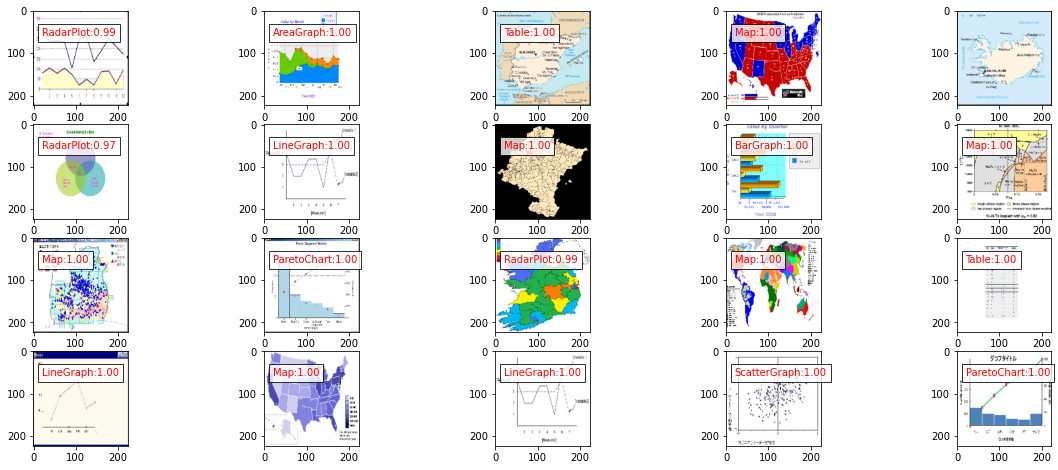

In [87]:
import numpy as np
from keras.preprocessing import image
fig=plt.figure(figsize=(20, 8))
columns = 5
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('C:\\Users\\rpshc\\Desktop\\Assingment\\Base_Folder\\test\\'+test_set.filenames[np.random.choice(range(90))], target_size=(224, 224))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    result = model_1.predict(img, batch_size=None,steps=1) #gives all class prob.
    if result[0][0]>0.5:
        value = 'AreaGraph:%1.2f'%result[0][0]
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        
    elif result[0][1]>0.5:
        value = 'BarGraph:%1.2f'%result[0][1]
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        
    elif result[0][2]>0.5:
        value ='LineGraph:%1.2f'%result[0][2]
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        
    elif result[0][3]>0.5:
        value ='Map:%1.2f'%result[0][3]
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        
    elif result[0][4]>0.5:
        value ='ParetoChart:%1.2f'%result[0][4]
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    
    elif result[0][5]>0.5:
        value ='PieChart:%1.2f'%result[0][5]
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
            
    elif result[0][6]>0.5:
        value ='RadarPlot:%1.2f'%result[0][6]
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
     
    elif result[0][7]>0.5:
        value ='ScatterGraph:%1.2f'%result[0][7]
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        
    elif result[0][8]>0.5:
        value ='Table:%1.2f'%result[0][8]
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        
    elif result[0][9]>0.5:
        value ='VennDiagram:%1.2f'%result[0][9]
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        
    plt.imshow(img1)
print(result)

In [88]:
model.metrics_names

['loss', 'acc']

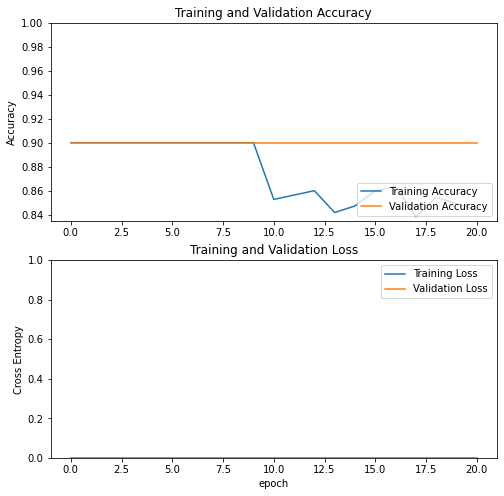

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [90]:
#Fine tuning
base_model.trainable = True

In [91]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  154


In [92]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [93]:
model_1.summary()
len(model_1.trainable_variables)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)       

14

In [94]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model_1.fit(train_set,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_set)

Epoch 10/20
14/14 [==============================] - 22s 2s/step - loss: 4.2042e-04 - accuracy: 1.0000 - val_loss: 1.1936 - val_accuracy: 0.8947
Epoch 11/20
14/14 [==============================] - 21s 2s/step - loss: 3.3349e-04 - accuracy: 1.0000 - val_loss: 1.2052 - val_accuracy: 0.8947
Epoch 12/20
14/14 [==============================] - 20s 1s/step - loss: 2.8708e-04 - accuracy: 1.0000 - val_loss: 1.2197 - val_accuracy: 0.8947
Epoch 13/20
14/14 [==============================] - 20s 1s/step - loss: 2.4987e-04 - accuracy: 1.0000 - val_loss: 1.2337 - val_accuracy: 0.8895
Epoch 14/20
14/14 [==============================] - 20s 1s/step - loss: 2.1869e-04 - accuracy: 1.0000 - val_loss: 1.2473 - val_accuracy: 0.8895
Epoch 15/20
14/14 [==============================] - 20s 1s/step - loss: 1.9115e-04 - accuracy: 1.0000 - val_loss: 1.2630 - val_accuracy: 0.8895
Epoch 16/20
14/14 [==============================] - 20s 1s/step - loss: 1.7019e-04 - accuracy: 1.0000 - val_loss: 1.2767 - val_ac

In [95]:
model.save('My_model_1.h5')
from tensorflow.keras.models import load_model
model_2 = load_model('My_model_1.h5')

In [96]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

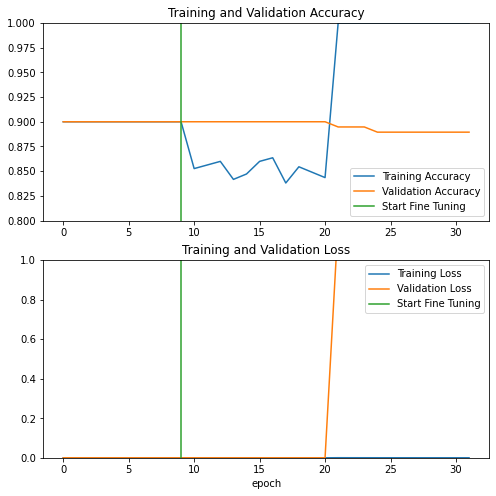

In [97]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

[[6.3956167e-12 1.6073964e-09 1.0128635e-06 1.9811301e-08 3.6752189e-07
  4.7757438e-09 7.3112547e-09 5.5453467e-07 3.6590055e-07 9.9999762e-01]]


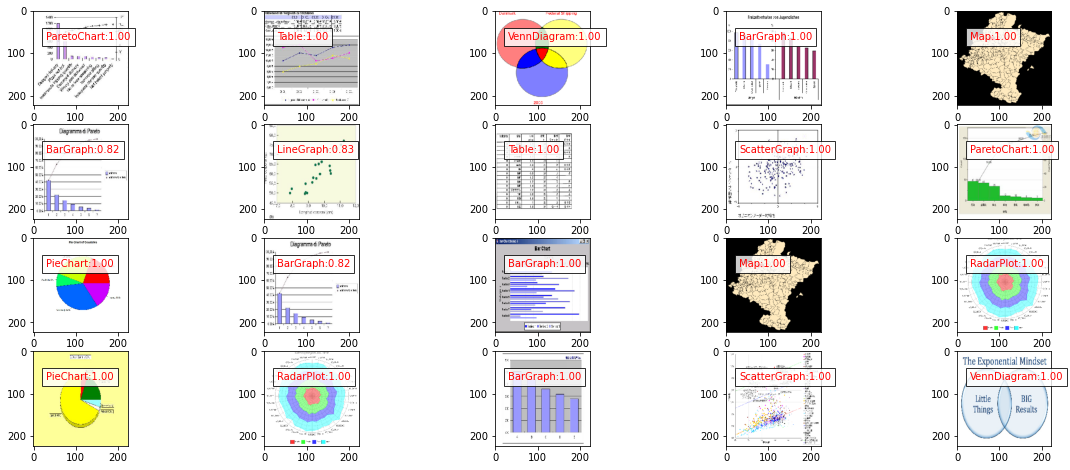

In [98]:
# for generator image set u can use 
# ypred = classifier.predict_generator(test_set)

import numpy as np
from keras.preprocessing import image
fig=plt.figure(figsize=(20, 8))
columns = 5
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('C:\\Users\\rpshc\\Desktop\\Assingment\\Base_Folder\\test\\'+test_set.filenames[np.random.choice(range(90))], target_size=(224, 224))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    result = model_2.predict(img, batch_size=None,steps=1) #gives all class prob.
    if result[0][0]>0.5:
        value = 'AreaGraph:%1.2f'%result[0][0]
        plt.text(30, 68,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    elif result[0][1]>0.5:
        value = 'BarGraph:%1.2f'%result[0][1]
        plt.text(30, 68,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    elif result[0][2]>0.5:
        value ='LineGraph:%1.2f'%result[0][2]
        plt.text(30, 68,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    elif result[0][3]>0.5:
        value ='Map:%1.2f'%result[0][3]
        plt.text(30, 68,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    elif result[0][4]>0.5:
        value ='ParetoChart:%1.2f'%result[0][4]
        plt.text(30, 68,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    
    elif result[0][5]>0.5:
        value ='PieChart:%1.2f'%result[0][5]
        plt.text(30, 68,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
            
    elif result[0][6]>0.5:
        value ='RadarPlot:%1.2f'%result[0][6]
        plt.text(30, 68,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
     
    elif result[0][7]>0.5:
        value ='ScatterGraph:%1.2f'%result[0][7]
        plt.text(30, 68,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        
    elif result[0][8]>0.5:
        value ='Table:%1.2f'%result[0][8]
        plt.text(30, 68,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        
    elif result[0][9]>0.5:
        value ='VennDiagram:%1.2f'%result[0][9]
        plt.text(30, 68,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
        
    plt.imshow(img1)
    
print(result)

In [99]:
loss, accuracy = model_2.evaluate(test_set)
print('Test accuracy :', accuracy)

3/3 [==============================] - 1s 287ms/step - loss: 2.0510 - accuracy: 0.8222
Test accuracy : 0.8222222328186035


In [42]:
loss, accuracy = model_2.evaluate(val_set)
print('Test accuracy :', accuracy)

6/6 [==============================] - 3s 564ms/step - loss: 1.1778 - acc: 0.9000
Test accuracy : 0.8999999761581421
